<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.956370,78.930703,31.152249,-0.106430,207.932893,208.062511,-0.129618
1,0.0,1.0,80.001441,98.766730,72.305803,0.010358,261.084331,261.105602,-0.021270
2,0.0,2.0,64.860630,64.855318,70.951138,0.018432,210.685518,210.687661,-0.002143
3,0.0,3.0,72.909100,21.998300,60.194117,0.032131,165.133649,165.124070,0.009578
4,0.0,4.0,82.546554,54.242286,97.295809,-0.093298,243.991350,244.126571,-0.135221
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.505239,65.753232,35.078317,0.132116,189.468904,189.355676,0.113227
59996,999.0,56.0,43.422709,25.876782,24.342926,0.153698,103.796115,103.618639,0.177476
59997,999.0,57.0,82.283646,69.275560,93.210944,0.198745,254.968895,254.765764,0.203131
59998,999.0,58.0,72.336167,27.720093,49.729734,0.058065,159.844060,159.749106,0.094953


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.956370  78.930703  31.152249 -0.106430  207.932893   
      1.0    80.001441  98.766730  72.305803  0.010358  261.084331   
      2.0    64.860630  64.855318  70.951138  0.018432  210.685518   
      3.0    72.909100  21.998300  60.194117  0.032131  165.133649   
      4.0    82.546554  54.242286  97.295809 -0.093298  243.991350   
...                ...        ...        ...       ...         ...   
999.0 55.0   78.505239  65.753232  35.078317  0.132116  189.468904   
      56.0   43.422709  25.876782  24.342926  0.153698  103.796115   
      57.0   82.283646  69.275560  93.210944  0.198745  254.968895   
      58.0   72.336167  27.720093  49.729734  0.058065  159.844060   
      59.0   50.451950  61.027202  89.536793  0.014803  211.030748   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    208.062511 -0.129618  
      1.0    261.105602 -0.021270  
      2.0    210.687661 -0.002143  
      3.0    165.124070  0.009578  
      4.0    244.126571 -0.135221  
...                 ...       ...  
999.0 55.0   189.355676  0.113227  
      56.0   103.618639  0.177476  
      57.0   254.765764  0.203131  
      58.0   159.749106  0.094953  
      59.0   211.006432  0.024316  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.956370  78.930703  31.152249 -0.106430  207.932893   
      1.0    80.001441  98.766730  72.305803  0.010358  261.084331   
      2.0    64.860630  64.855318  70.951138  0.018432  210.685518   
      3.0    72.909100  21.998300  60.194117  0.032131  165.133649   
      4.0    82.546554  54.242286  97.295809 -0.093298  243.991350   
...                ...        ...        ...       ...         ...   
999.0 55.0   78.505239  65.753232  35.078317  0.132116  189.468904   
      56.0   43.422709  25.876782  24.342926  0.153698  103.796115   
      57.0   82.283646  69.275560  93.210944  0.198745  254.968895   
      58.0   72.336167  27.720093  49.729734  0.058065  159.844060   
      59.0   50.451950  61.027202  89.536793  0.014803  211.030748   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    208.062511 -0.129618  
      1.0    261.105602 -0.021270  
      2.0    210.687661 -0.002143  
      3.0    165.124070  0.009578  
      4.0    244.126571 -0.135221  
...                 ...       ...  
999.0 55.0   189.355676  0.113227  
      56.0   103.618639  0.177476  
      57.0   254.765764  0.203131  
      58.0   159.749106  0.094953  
      59.0   211.006432  0.024316  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.956370,78.930703,31.152249,-0.106430,207.932893,208.062511,-0.129618
1,0.0,1.0,80.001441,98.766730,72.305803,0.010358,261.084331,261.105602,-0.021270
2,0.0,2.0,64.860630,64.855318,70.951138,0.018432,210.685518,210.687661,-0.002143
3,0.0,3.0,72.909100,21.998300,60.194117,0.032131,165.133649,165.124070,0.009578
4,0.0,4.0,82.546554,54.242286,97.295809,-0.093298,243.991350,244.126571,-0.135221
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.505239,65.753232,35.078317,0.132116,189.468904,189.355676,0.113227
59996,999.0,56.0,43.422709,25.876782,24.342926,0.153698,103.796115,103.618639,0.177476
59997,999.0,57.0,82.283646,69.275560,93.210944,0.198745,254.968895,254.765764,0.203131
59998,999.0,58.0,72.336167,27.720093,49.729734,0.058065,159.844060,159.749106,0.094953


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.956370  78.930703  31.152249 -0.106430  207.932893   
      1.0    80.001441  98.766730  72.305803  0.010358  261.084331   
      2.0    64.860630  64.855318  70.951138  0.018432  210.685518   
      3.0    72.909100  21.998300  60.194117  0.032131  165.133649   
      4.0    82.546554  54.242286  97.295809 -0.093298  243.991350   
...                ...        ...        ...       ...         ...   
999.0 55.0   78.505239  65.753232  35.078317  0.132116  189.468904   
      56.0   43.422709  25.876782  24.342926  0.153698  103.796115   
      57.0   82.283646  69.275560  93.210944  0.198745  254.968895   
      58.0   72.336167  27.720093  49.729734  0.058065  159.844060   
      59.0   50.451950  61.027202  89.536793  0.014803  211.030748   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    208.062511 -0.129618  
      1.0    261.105602 -0.021270  
      2.0    210.687661 -0.002143  
      3.0    165.124070  0.009578  
      4.0    244.126571 -0.135221  
...                 ...       ...  
999.0 55.0   189.355676  0.113227  
      56.0   103.618639  0.177476  
      57.0   254.765764  0.203131  
      58.0   159.749106  0.094953  
      59.0   211.006432  0.024316  

[60000 rows x 7 columns]

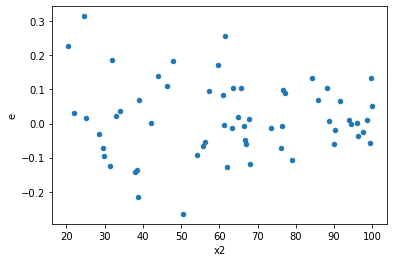

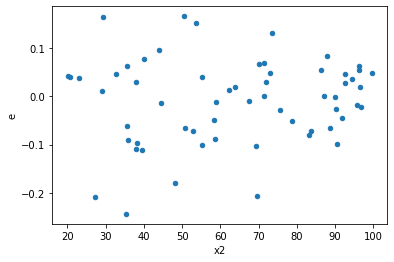

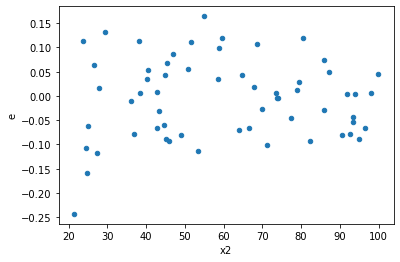

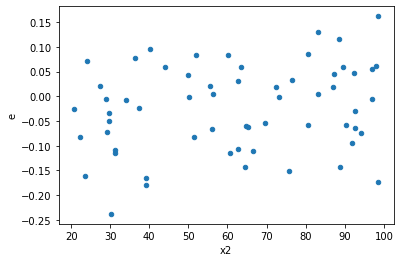

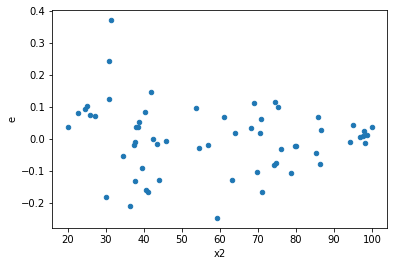

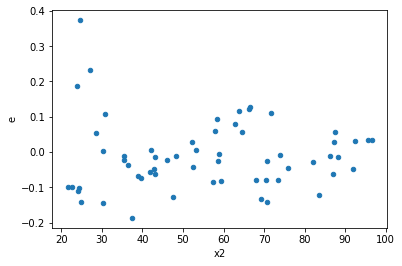

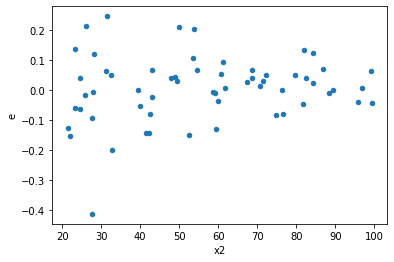

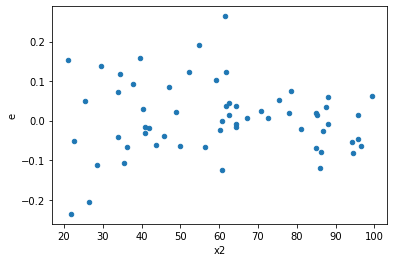

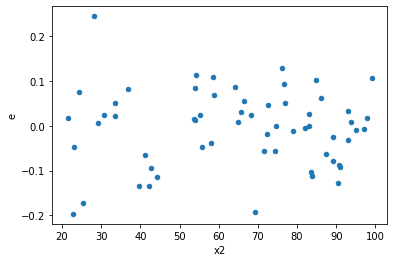

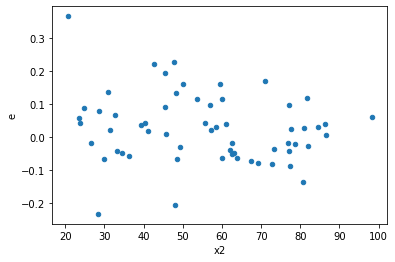

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,35.0,19.0,0.19266722866580813,0.17085158678514012,0.005504777961880232,0.00899218877816527,1.6335243383901836,0.2573508919509955,0.8713245540245023,0.12867544597549774,Reject005=1 : Homoscedasticity
3.0,37.0,17.0,0.25136361502020166,0.15966833019323723,0.006793611216762207,0.009392254717249249,1.3825128370718776,0.4801312774526767,0.7599343612736617,0.24006563872633835,Reject005=1 : Homoscedasticity
4.0,27.0,27.0,0.16031332624076933,0.3820235595293535,0.005937530601509975,0.01414902072330939,2.3829806821898565,0.027674148211679128,0.9861629258941604,0.013837074105839564,Reject005=0 : Heteroscedasticity
8.0,33.0,21.0,0.1692211492360706,0.23355268671120324,0.00512791361321426,0.011121556510057298,2.1688268073389256,0.06585538478900821,0.9670723076054959,0.032927692394504104,Reject005=1 : Homoscedasticity
11.0,27.0,27.0,0.16194824518237264,0.2877864232974071,0.00599808315490269,0.010658756418422486,1.7770271173566963,0.14154388234153759,0.9292280588292312,0.07077194117076879,Reject005=1 : Homoscedasticity
15.0,24.0,30.0,0.23875427933433946,0.7361032026802194,0.009948094972264144,0.02453677342267398,2.4664796115320478,0.020133099924274367,0.9899334500378628,0.010066549962137183,Reject005=0 : Heteroscedasticity
18.0,23.0,31.0,0.1522451441069617,0.2157795705881972,0.00661935409160703,0.006960631309296684,1.0515574802264127,0.8827824240090614,0.5586087879954693,0.4413912120045307,Reject005=1 : Homoscedasticity
20.0,26.0,28.0,0.15943957537889714,0.2993684853968053,0.006132291360726813,0.010691731621314473,1.7435133121344817,0.15254655475186074,0.9237267226240696,0.07627327737593037,Reject005=1 : Homoscedasticity
24.0,33.0,21.0,0.150004727805555,0.4076313928111025,0.004545597812289545,0.019411018705290595,4.2702895211738,0.0009130115601005961,0.9995434942199497,0.00045650578005029807,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,31.0,0.33624497746209886,0.3235338487579456,0.014619346846178211,0.010436575766385342,0.7138879647768718,0.4067421674602468,Reject005=1 : Homoscedasticity
1.0,32.0,22.0,0.27179913159451796,0.13009175334187267,0.008493722862328686,0.005913261515539667,0.6961919539153005,0.3430999307386637,Reject005=1 : Homoscedasticity
2.0,35.0,19.0,0.19266722866580813,0.17085158678514012,0.005504777961880232,0.00899218877816527,1.6335243383901836,0.2573508919509955,Reject005=1 : Homoscedasticity
3.0,37.0,17.0,0.25136361502020166,0.15966833019323723,0.006793611216762207,0.009392254717249249,1.3825128370718776,0.4801312774526767,Reject005=1 : Homoscedasticity
4.0,27.0,27.0,0.16031332624076933,0.3820235595293535,0.005937530601509975,0.01414902072330939,2.3829806821898565,0.027674148211679128,Reject005=0 : Heteroscedasticity
5.0,27.0,27.0,0.3345068469118155,0.1531217986488336,0.012389142478215388,0.005671177727734578,0.4577538548536808,0.046924825687316214,Reject005=0 : Heteroscedasticity
6.0,26.0,28.0,0.4956619046760741,0.14278859077112324,0.019063919410618236,0.005099592527540116,0.2674996897384984,0.0011451694142948176,Reject005=0 : Heteroscedasticity
7.0,32.0,22.0,0.3853271800818824,0.0713877720152609,0.012041474377558824,0.003244898727966405,0.269476861904368,0.0007808853766252395,Reject005=0 : Heteroscedasticity
8.0,33.0,21.0,0.1692211492360706,0.23355268671120324,0.00512791361321426,0.011121556510057298,2.1688268073389256,0.06585538478900821,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      749
Reject005=0 : Heteroscedasticity    251
Name: Result_test, dtype: int64